In [22]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

df = pd.read_csv(url, names=columns)
df.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.shape

(1372, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Length: 1372, dtype: bool

In [16]:
x=df.drop('class',axis=1)
y=df['class']

In [18]:
print(df.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [20]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

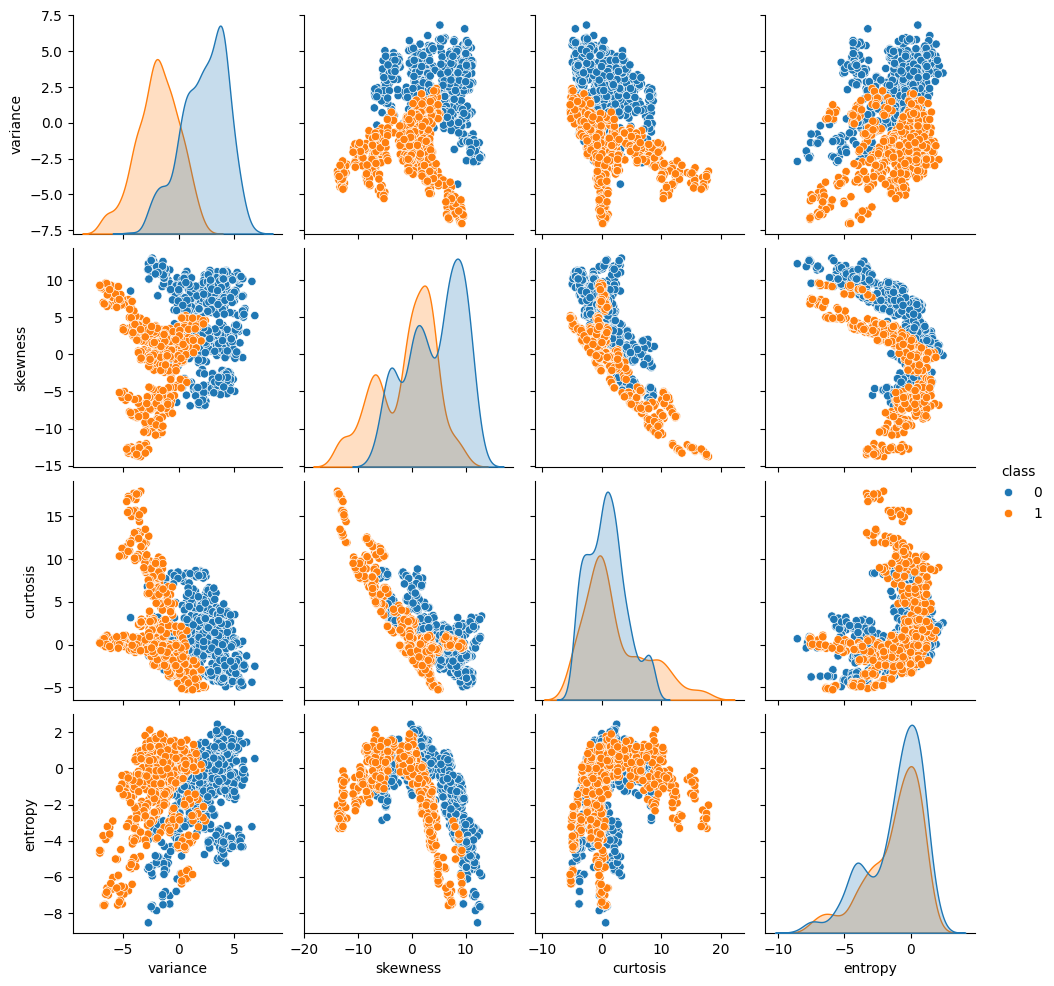

In [26]:
sns.pairplot(df,hue='class')

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
model = GradientBoostingClassifier(
    n_estimators=100,     # Number of trees
    learning_rate=0.1,    # Shrinkage rate
    max_depth=3,          # Each tree can split up to 3 levels
    random_state=42
)

# Train the model
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
y_pred = model.predict(x_test)

# Print accuracy
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

✅ Accuracy: 99.64 %
